In [1]:
!wget https://minio.lab.sspcloud.fr/gamer35/public/bdappv.zip

--2023-05-04 03:24:45--  https://minio.lab.sspcloud.fr/gamer35/public/bdappv.zip
Resolving minio.lab.sspcloud.fr (minio.lab.sspcloud.fr)... 192.168.253.151, 192.168.253.152
Connecting to minio.lab.sspcloud.fr (minio.lab.sspcloud.fr)|192.168.253.151|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8197454201 (7.6G) [binary/octet-stream]
Saving to: ‘bdappv.zip’

bdappv.zip          100%[===================>]   7.63G   162MB/s    in 42s     

2023-05-04 03:25:27 (187 MB/s) - ‘bdappv.zip’ saved [8197454201/8197454201]



In [2]:
!unzip bdappv.zip
!rm bdappv.zip

Archive:  bdappv.zip
   creating: bdappv/
  inflating: __MACOSX/._bdappv       
  inflating: bdappv/.DS_Store        
  inflating: __MACOSX/bdappv/._.DS_Store  
   creating: bdappv/google/
  inflating: __MACOSX/bdappv/._google  
   creating: bdappv/ign/
  inflating: __MACOSX/bdappv/._ign   
  inflating: bdappv/metadata.csv     
  inflating: __MACOSX/bdappv/._metadata.csv  
  inflating: bdappv/google/.DS_Store  
  inflating: __MACOSX/bdappv/google/._.DS_Store  
   creating: bdappv/google/img/
  inflating: __MACOSX/bdappv/google/._img  
   creating: bdappv/google/mask/
  inflating: __MACOSX/bdappv/google/._mask  
  inflating: bdappv/ign/.DS_Store    
  inflating: __MACOSX/bdappv/ign/._.DS_Store  
   creating: bdappv/ign/img/
  inflating: __MACOSX/bdappv/ign/._img  
   creating: bdappv/ign/mask/
  inflating: __MACOSX/bdappv/ign/._mask  
  inflating: bdappv/google/img/QHIAP38B1OQXHG.png  
  inflating: __MACOSX/bdappv/google/img/._QHIAP38B1OQXHG.png  
  inflating: bdappv/google/img/SZZQN315

In [3]:
!pip install pandas
!pip install sklearn
!pip install scikit-learn
!pip install torch
!pip install pillow
!pip install numpy
!pip install matplotlib
!pip install torchvision
!pip install scikit-image
!pip install tensorflow
!pip install seaborn
!pip install opencv-python
!sudo apt-get update && sudo apt-get install ffmpeg libsm6 libxext6 -y

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 10.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 5.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2951 sha256=f83a7ac9988410ebf8a1543eb71f4eebf900011bfc418e851ebf1ad08a96f979
  Stored in directory: /home/onyxia/.cache/pip/wheels/46/b8/69/4f7789b7d2fc0718a44cbc4ae5d40970a40c22c472ae50f0a1
Successfully built sklearn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 25.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 22.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 27.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0

In [4]:
from  src.dataloader import *
from src.bdappv import *
from src.metrics import *
from src.resnet18 import *
from src.confusion_matrix import make_confusion_matrix
from torch.utils.data import DataLoader, SubsetRandomSampler
import matplotlib.pyplot as plt
from torchvision import transforms, datasets
import torch.nn as nn
import tensorflow as tf
from sklearn.metrics import fbeta_score, make_scorer, f1_score, accuracy_score, recall_score, precision_score, fbeta_score, precision_recall_curve, auc, roc_curve, log_loss, confusion_matrix
import torchvision.models as models
import os
from src.tsne import *
from torch.utils.data import DataLoader
import matplotlib
import torchvision.models as models
from sklearn.manifold import TSNE
import math

2023-05-04 03:38:58.582306: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-04 03:38:58.647853: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 03:38:59.603891: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
torch.cuda.device_count()

1

## Import et data augmentations

In [6]:
dataset=BDAPPVClassification(img_dir="/home/onyxia/work/statapps/bdappv/google", size=None)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [ ]:
mean, std = batch_mean_and_sd(dataloader)
print("Moyenne par channel: {}".format(mean.tolist()))
print("Ecart-type par channel: {}".format(std.tolist()))

In [ ]:
dataset_crop=BDAPPVClassification(img_dir="/home/onyxia/work/statapps/bdappv/google",
                                  size=224,
                                  transform=transforms.Compose([transforms.Normalize(mean = mean,
                                                                    std= std)]))


In [ ]:
seed = 123
torch.manual_seed(seed)
np.random.seed(seed)

dataset_crop=BDAPPVClassification(img_dir="/home/onyxia/work/statapps/bdappv/google",
                                  size=224,
                                  transform=transforms.Compose([transforms.Normalize(mean = mean,
                                                                    std= std)]))

# Define the indices for training and testing sets
n = len(dataset)
train_size = int(0.8 * n)
test_size = n - train_size
train_indices = torch.arange(0, train_size)
test_indices = torch.arange(train_size, n)

# Define the samplers for training and testing sets
train_sampler = SubsetRandomSampler(train_indices)
test_sampler = SubsetRandomSampler(test_indices)

# Define the dataloaders for training and testing sets
train_dataloader_augmente = DataLoader(dataset_crop, batch_size=32, sampler=train_sampler)
test_dataloader_augmente = DataLoader(dataset_crop, batch_size=32, sampler=test_sampler)

print(len(train_dataloader_augmente))
batch = next(iter(train_dataloader_augmente))
print(batch[0].shape)
plt.imshow(batch[0][0].permute(1, 2, 0))
print(batch[1][0])

In [ ]:
resnet18 = models.resnet18(pretrained=True)

nr_filters = resnet18.fc.in_features  #number of input features of last layer
#On ne met pas de sigmoid dans la dernière couche. C'est composé par la loss BCEWithLogitsLoss qui applique une sigmoid afin de calculer la cross-enthropy
resnet18.fc = nn.Linear(nr_filters, 1)

resnet18.layer1.append(nn.Dropout(0.1))
resnet18.layer2.append(nn.Dropout(0.6))
resnet18.layer3.append(nn.Dropout(0.3))
resnet18.layer4.append(nn.Dropout(0.8))

# Lancement du modèle

Les cinq premières métriques représentent les performances de notre algorithme sur l'échantillon d'entrainement, les cinq dernières valeurs (celles précédées du préfixe val_) sont elles calculées sur l'échantillon de test. 

In [ ]:
def sig(x):
    return 1/(1 + np.exp(-x))

def train_model(model, train_loader, valid_loader, criterion, n_epochs, path_save_model, device=None):
    """Train the model"""
    if device is None:
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    if torch.cuda.device_count() > 1:
        print("Using", torch.cuda.device_count(), "GPUs")
        model = nn.DataParallel(model)

    model.to(device)

    # number of epochs to train the model
    train_losses = []
    train_f1s = []
    train_accuracys = []
    train_recalls = []
    train_precisions = []
    train_f2s = []

    valid_loss_min = np.Inf  # set initial "min" to infinity
    val_losses= []
    val_f1s=[]
    val_accuracys=[]
    val_recalls=[]
    val_precisions=[]
    val_f2s=[]

    params_to_update = model.parameters()
    optimizer = torch.optim.SGD(params_to_update, lr=0.001, momentum=0.9, weight_decay=1e-4)
    
    for epoch in range(n_epochs):

        # monitor losses
        train_loss = 0
        train_f1 = 0
        train_accuracy = 0
        train_recall = 0
        train_precision = 0
        train_f2 = 0
        iter = 0
        
        valid_loss=0
        valid_f1=0
        valid_accuracy=0
        valid_recall=0
        valid_precision=0
        valid_f2=0


        ###################
        # train the model #
        ###################
        model.train() # prep model for training

        for data, label in train_loader:
            
            # move data and labels to the device
            data = data.to(device)
            label = label.to(device)

            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)

            # calculate the loss
            preds = torch.sigmoid(output) > 0.5
            loss = criterion(output, label.unsqueeze(1).float())
            f1 = f1_score(label.cpu().numpy(), preds.cpu().numpy().T[0])
            accuracy = accuracy_score(label.cpu().numpy(), preds.cpu().numpy().T[0])
            recall = recall_score(label.cpu().numpy(), preds.cpu().numpy().T[0])
            precision = precision_score(label.cpu().numpy(), preds.cpu().numpy().T[0])
            f2 = fbeta_score(label.cpu().numpy(), preds.cpu().numpy().T[0], beta=2)
            iter += 1

            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            
            # perform a single optimization step (parameter update)
            optimizer.step()
            
            # update running training loss
            train_loss += loss.item() * data.size(0)
            train_f1 += f1
            train_accuracy += accuracy
            train_recall += recall
            train_precision += precision
            train_f2 += f2
            

        # calculate average loss over an epoch
        train_loss = train_loss / len(train_loader.dataset)
        train_f1 = train_f1 / iter
        train_accuracy = train_accuracy / iter
        train_recall = train_recall / iter
        train_precision = train_precision / iter
        train_f2 = train_f2 / iter

        train_losses.append(train_loss)
        train_f1s.append(train_f1)
        train_accuracys.append(train_accuracy)
        train_recalls.append(train_recall)
        train_precisions.append(train_precision)
        train_f2s.append(train_f2)
        
        for data,label in valid_loader:

            data = data.to(device)
            label = label.to(device)

            with torch.no_grad():
                output = model(data)
                
            output_detach = output.detach()

            # calculate the loss
            preds=torch.zeros(output_detach.shape[0], output_detach.shape[1],dtype=torch.float32, device=device)
            preds = torch.round(torch.sigmoid(output_detach)).float()
            
            loss = criterion(output,label.unsqueeze(1).float())
            f1 = f1_score(label.cpu().numpy(), preds.T.cpu().numpy()[0])
            accuracy= accuracy_score(label.cpu().numpy(), preds.T.cpu().numpy()[0])
            recall= recall_score(label.cpu().numpy(), preds.T.cpu().numpy()[0])
            precision= precision_score(label.cpu().numpy(), preds.T.cpu().numpy()[0])
            f2=fbeta_score(label.cpu().numpy(), preds.T.cpu().numpy()[0], beta=2)

            # update running validation loss 
            valid_loss+=loss.item() * data.size(0)
            valid_f1+=f1
            valid_accuracy+=accuracy
            valid_recall+=recall
            valid_precision+=precision
            valid_f2+=f2
            iter+=1

        valid_loss=valid_loss/len(valid_loader.sampler)
        valid_f1=valid_f1/iter
        valid_accuracy=valid_accuracy/iter
        valid_recall=valid_recall/iter
        valid_precision=valid_precision/iter
        valid_f2=valid_f2/iter

        val_losses.append(valid_loss)
        val_f1s.append(valid_f1)
        val_accuracys.append(valid_accuracy)
        val_recalls.append(valid_recall)
        val_precisions.append(valid_precision)
        val_f2s.append(valid_f2)


        print('Epoch: {} \tTraining Loss: {:.6f} \tTraining F1-score: {:.6f} \tTraining accuracy: {:.6f} \tTraining recall: {:.6f} \tTraining precision: {:.6f} \tTraining F2-score: {:.6f} \tValidation Loss: {:.6f} \tValidation F1-score: {:.6f} \tValidation accuracy: {:.6f} \tValidation recall: {:.6f} \tValidation precision: {:.6f} \tValidation F2-score: {:.6f}'.format(
            epoch+1, 
            train_loss,
            train_f1,
            train_accuracy,
            train_recall,
            train_precision,
            train_f2,
            valid_loss,
            valid_f1,
            valid_accuracy,
            valid_recall,
            valid_precision,
            valid_f2
            ))
        
    torch.save(model.state_dict(), os.path.join(path_save_model,"trained_resnet18.pth"))

    return train_losses, train_f1s, train_accuracys, train_recalls, train_precisions, train_f2s, val_losses, val_f1s, val_accuracys, val_recalls, val_precisions, val_f2s

def predict(model, path_model, valid_loader, device=None):
    """Pour prédire 0/1 à partir de l'échantillon de validation
       /!\ certains commentaires sont à passer en code pour passer sur GPU
    """
    if device is None:
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    if torch.cuda.device_count() > 1:
        print("Using", torch.cuda.device_count(), "GPUs")
        model = nn.DataParallel(model)
    
    model.to(device)

    model.load_state_dict(torch.load(path_model))
    model.eval()

    array_labels=np.array([])
    array_preds=np.array([])
    probas_pred=np.array([])

    for data,label in valid_loader:
        # Pour utiliser GPU
        data = data.to(device)
        label = label.to(device)

        with torch.no_grad():
            output = model(data)
        output_detach = output.cpu().detach()  # Move to CPU and detach from GPU

        # calculate the loss
        preds=torch.zeros(output_detach.shape[0], output_detach.shape[1])
        probas=torch.zeros(output_detach.shape[0], output_detach.shape[1])

        for i in range(len(output_detach)):
            if sig(output_detach[i])>0.5:
                preds[i]=1
            else:
                preds[i]=0
            probas[i]=sig(output_detach[i])
        probas_pred=np.append(probas_pred, probas.T.numpy()[0])
        array_preds=np.append(array_preds,preds.T.numpy()[0])
        array_labels=np.append(array_labels, label.cpu().numpy())  # Move to CPU and convert to numpy

    return array_labels, array_preds, probas_pred


In [ ]:
print(resnet18.parameters())

In [ ]:
seed = 123
torch.manual_seed(seed)
np.random.seed(seed)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loss=nn.BCEWithLogitsLoss()
# Train model
train_losses, train_f1s, train_accuracys, train_recalls, train_precisions, train_f2s, val_losses, val_f1s, val_accuracys, val_recalls, val_precisions, val_f2s = train_model(model=resnet18, 
                                                                                 train_loader=train_dataloader_augmente,
                                                                                 valid_loader=test_dataloader_augmente,
                                                                                 criterion=loss, 
                                                                                 n_epochs=30, 
                                                                                 path_save_model="/home/onyxia/work/statapps",
                                                                                 device=None)

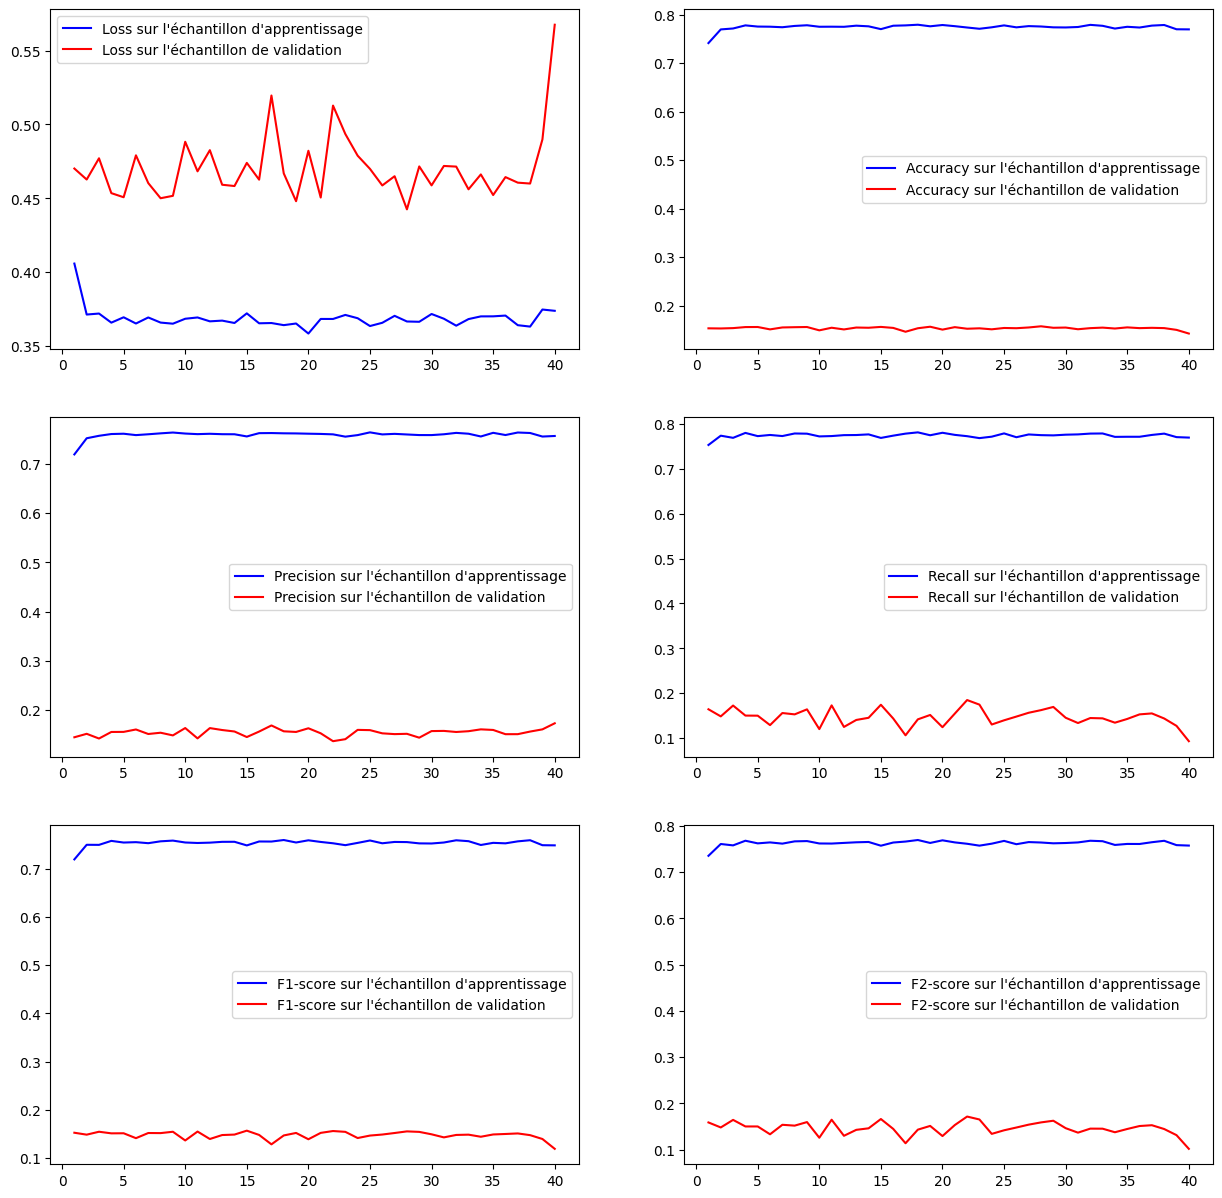

In [28]:
dict_train_losses={}
dict_train_f1s={}
dict_train_accuracys={}
dict_train_recalls={}
dict_train_precisions={}
dict_train_f2s={}

dict_val_losses={}
dict_val_f1s={}
dict_val_accuracys={}
dict_val_recalls={}
dict_val_precisions={}
dict_val_f2s={}

for i in range(0,40):
    dict_train_losses[i+1]=train_losses[i]
    dict_train_f1s[i+1]=train_f1s[i]
    dict_train_accuracys[i+1]=train_accuracys[i]
    dict_train_recalls[i+1]=train_recalls[i]
    dict_train_precisions[i+1]=train_precisions[i]
    dict_train_f2s[i+1]=train_f2s[i]

    dict_val_losses[i+1]=val_losses[i]
    dict_val_f1s[i+1]=val_f1s[i]
    dict_val_accuracys[i+1]=val_accuracys[i]
    dict_val_recalls[i+1]=val_recalls[i]
    dict_val_precisions[i+1]=val_precisions[i]
    dict_val_f2s[i+1]=val_f2s[i]

sorted_train_losses = sorted(dict_train_losses.items())
sorted_train_f1s = sorted(dict_train_f1s.items())
sorted_train_accuracys = sorted(dict_train_accuracys.items())
sorted_train_recalls = sorted(dict_train_recalls.items())
sorted_train_precisions = sorted(dict_train_precisions.items())
sorted_train_f2s = sorted(dict_train_f2s.items())

sorted_val_losses = sorted(dict_val_losses.items())
sorted_val_f1s = sorted(dict_val_f1s.items())
sorted_val_accuracys = sorted(dict_val_accuracys.items())
sorted_val_recalls = sorted(dict_val_recalls.items())
sorted_val_precisions = sorted(dict_val_precisions.items())
sorted_val_f2s = sorted(dict_val_f2s.items())

epochs, loss_train = zip(*sorted_train_losses)
epochs, f1_train = zip(*sorted_train_f1s)
epochs, acc_train = zip(*sorted_train_accuracys)
epochs, recall_train = zip(*sorted_train_recalls)
epochs, precision_train =zip(*sorted_train_precisions)
epochs, f2_train = zip(*sorted_train_f2s)

epochs, loss_val = zip(*sorted_val_losses)
epochs, f1_val = zip(*sorted_val_f1s)
epochs, acc_val = zip(*sorted_val_accuracys)
epochs, recall_val = zip(*sorted_val_recalls)
epochs, precision_val =zip(*sorted_val_precisions)
epochs, f2_val = zip(*sorted_val_f2s)


fig, axs = plt.subplots(3, 2, figsize=(15, 15))

axs[0,0].plot(epochs, loss_train, 'b',label="Loss sur l'échantillon d'apprentissage", color="blue")
axs[0,0].plot(epochs, loss_val, 'b',label="Loss sur l'échantillon de validation", color="red")
axs[0,0].legend()

axs[0,1].plot(epochs, acc_train, 'b',label="Accuracy sur l'échantillon d'apprentissage", color="blue")
axs[0,1].plot(epochs, acc_val, 'b',label="Accuracy sur l'échantillon de validation", color="red")
axs[0,1].legend()

axs[1,0].plot(epochs, precision_train, 'b',label="Precision sur l'échantillon d'apprentissage", color="blue")
axs[1,0].plot(epochs, precision_val, 'b',label="Precision sur l'échantillon de validation", color="red")
axs[1,0].legend()

axs[1,1].plot(epochs, recall_train, 'b',label="Recall sur l'échantillon d'apprentissage", color="blue")
axs[1,1].plot(epochs, recall_val, 'b',label="Recall sur l'échantillon de validation", color="red")
axs[1,1].legend()

axs[2,0].plot(epochs, f1_train, 'b',label="F1-score sur l'échantillon d'apprentissage", color="blue")
axs[2,0].plot(epochs, f1_val, 'b',label="F1-score sur l'échantillon de validation", color="red")
axs[2,0].legend()

axs[2,1].plot(epochs, f2_train, 'b',label="F2-score sur l'échantillon d'apprentissage", color="blue")
axs[2,1].plot(epochs, f2_val, 'b',label="F2-score sur l'échantillon de validation", color="red")
axs[2,1].legend()

plt.savefig('courbes_loss_resnet18_transfertlearning.png')
plt.show()


In [29]:
y_true_train, y_pred_train, proba_pred_train=predict(model=resnet18, path_model="/home/onyxia/work/statapps/trained_resnet18.pth", valid_loader=train_dataloader_augmente, device=None)
y_true_val, y_pred_val, proba_pred_val=predict(model=resnet18, path_model="/home/onyxia/work/statapps/trained_resnet18.pth", valid_loader=test_dataloader_augmente, device=None)

Loss sur l'échantillon train: 0.56
Accuracy sur l'échantillon train: 0.69
Recall sur l'échantillon train: 0.35
Precision sur l'échantillon train: 0.93
F1-score sur l'échantillon train: 0.51
F2-score sur l'échantillon train: 0.4 

Loss sur l'échantillon test: 0.56
Accuracy sur l'échantillon test: 0.68
Recall sur l'échantillon test: 0.34
Precision sur l'échantillon test: 0.93
F1-score sur l'échantillon test: 0.5
F2-score sur l'échantillon test: 0.39
AUC: 0.9


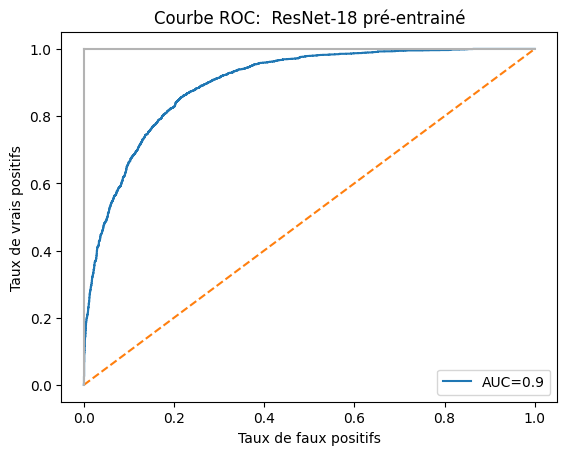

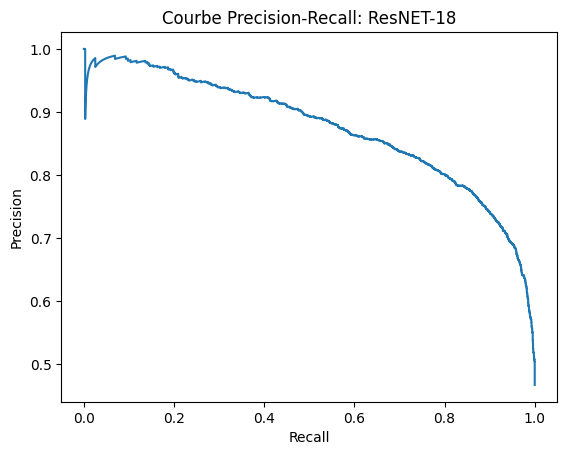

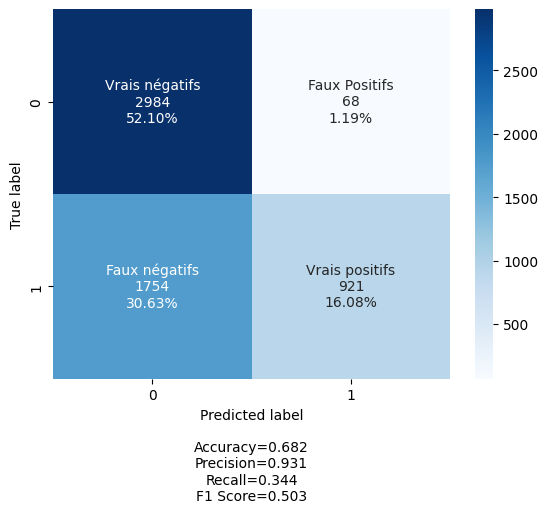

In [30]:
print("Loss sur l'échantillon train: {}".format(round(log_loss(y_true_train, proba_pred_train),2)))
print("Accuracy sur l'échantillon train: {}".format(round(accuracy_score(y_true_train, y_pred_train),2)))
print("Recall sur l'échantillon train: {}".format(round(recall_score(y_true_train, y_pred_train),2)))
print("Precision sur l'échantillon train: {}".format(round(precision_score(y_true_train, y_pred_train),2)))
print("F1-score sur l'échantillon train: {}".format(round(f1_score(y_true_train, y_pred_train),2)))
print("F2-score sur l'échantillon train: {} \n".format(round(fbeta_score(y_true_train, y_pred_train, beta=2),2)))

print("Loss sur l'échantillon test: {}".format(round(log_loss(y_true_val, proba_pred_val),2)))
print("Accuracy sur l'échantillon test: {}".format(round(accuracy_score(y_true_val, y_pred_val),2)))
print("Recall sur l'échantillon test: {}".format(round(recall_score(y_true_val, y_pred_val),2)))
print("Precision sur l'échantillon test: {}".format(round(precision_score(y_true_val, y_pred_val),2)))
print("F1-score sur l'échantillon test: {}".format(round(f1_score(y_true_val, y_pred_val),2)))
print("F2-score sur l'échantillon test: {}".format(round(fbeta_score(y_true_val, y_pred_val, beta=2),2)))

FP_rate, TP_rate, thresholds_keras = roc_curve(y_true_val, proba_pred_val)
AUC= auc(FP_rate, TP_rate)
print("AUC: {}".format(round(AUC, 2)))

plt.title('Courbe ROC:  ResNet-18 pré-entrainé')
plt.plot(FP_rate, TP_rate, label="AUC="+str(round(AUC, 2)))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel('Taux de vrais positifs')
plt.xlabel('Taux de faux positifs')
plt.legend(loc=4)
plt.savefig('ROC_resnet18.png')
plt.show()

prec, rec, thresholds_keras = precision_recall_curve(y_true_val, proba_pred_val)

fig, ax = plt.subplots()
ax.plot(rec, prec)

#add axis labels to plot
ax.set_title('Courbe Precision-Recall: ResNET-18')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.savefig('prec_recall_resnet18.png')
plt.show()

r = confusion_matrix(y_true_val, y_pred_val)

labels = ["Vrais négatifs", "Faux Positifs", "Faux négatifs", "Vrais positifs"]
categories = ["0", "1"]
make_confusion_matrix(r,
                      group_names=labels,
                      categories=categories,
                      )